# syHEP code for $ee-h-\chi\chi$ (s-channel) amplitude and total cross-section

In [4]:
#!python -m pip install -r ../requirements.txt

- Auxiliary Functions

In [1]:
import sympy as sy

import sys,os
sys.path.append('..')
import syHEP.src.syhep as hep

from syHEP.src.syhep.extras import Amplitude_schannel

from app.modules.functions import find_symbol, get_py_src

## Thermal relic abundance for DM, where  $\Omega(\chi \chi \to h \to \ell \ell)$

In [8]:
def gamma(dm_type: str, **kwargs):
    if dm_type == 'scalar':
        print('dm scalar')
        print(kwargs['s'])
    
    else:
        print('none')


In [9]:
parameters = {'s': 2,
              'Mmed': 10,

}
gamma('scalar', **parameters)

dm scalar
2


In [2]:
#import utils.colorb_2D as cb2d
#import models.sigma0_xsections as sig0
import app.models.general_parameters as gp
import app.models.relic_density_calc as ohm
import app.models.radiative_factorization as hp
import app.models.pdf_integration as qcd
import app.utils.colorb_2D as cb2d
#import lhapdf  

SyntaxError: invalid syntax (relic_density_calc.py, line 4)

## Define python functions 

For the decays and cross-sections from the scalar mediator

In [116]:
# ↑ Copy from the last output and do some tweaks

import numpy as np


@np.vectorize
def gamma_scalar(g_s_psi, m_f, M_med):
    return g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)/(np.pi*M_med)

@np.vectorize
def gamma_fermion(g_s_psi, m_f, M_med):
    return (1/16)*g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)*(M_med**2 - 4*m_f**2)/(np.pi*M_med)

@np.vectorize
def gamma_vector(g_s_psi, m_f, M_med):
    return (1/64)*g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)*(M_med**4 - 8*M_med**2*m_f**2 + 16*m_f**4)/(np.pi*M_med*m_f**4)


gamma_func_dict = {'scalar': gamma_scalar,
                   'fermion': gamma_fermion,
                   'vector': gamma_vector,
}
## 

@np.vectorize
def scalar_DM_scalar_med(M_med, g_ps_psi, g_ps_chi, s, g_s_chi, g_s_psi, m_f, Gamma_func):
    
    g_ps_psi = g_s_psi # Equal couplings for scalar and pseudo-scalar mediators
    g_ps_chi = g_s_chi # Equal couplings for scalar and pseudo-scalar mediators
    Bi = Gamma_func(g_ps_psi, m_f, M_med) # Initial states branching ratio
    Bf = Gamma_func(g_ps_chi, m_f, M_med) # Final states branching ratio
    Gamma = Bi + Bf

    return 16*g_s_chi**2*(g_ps_psi**2 + g_s_psi**2)*np.sqrt(-4*m_f**2 + s)/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))

@np.vectorize
def fermion_DM_scalar_med(M_med, g_ps_psi, g_ps_chi, s, g_s_chi, g_s_psi, m_f, Gamma_func):
    
    g_ps_psi = g_s_psi # Equal couplings for scalar and pseudo-scalar mediators
    g_ps_chi = g_s_chi # Equal couplings for scalar and pseudo-scalar mediators
    Bi = Gamma_func(g_ps_psi, m_f, M_med) # Initial states branching ratio
    Bf = Gamma_func(g_ps_chi, m_f, M_med) # Final states branching ratio
    Gamma = Bi + Bf

    
    return (1/2)*np.sqrt(-4*m_f**2 + s)*(-4*g_s_chi**2*m_f**2*(g_ps_psi**2 + g_s_psi**2) + s*(g_ps_chi**2*g_ps_psi**2 + g_ps_chi**2*g_s_psi**2 + g_ps_psi**2*g_s_chi**2 + g_s_chi**2*g_s_psi**2))/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))

@np.vectorize
def vector_DM_scalar_med(M_med, g_ps_psi, g_ps_chi, s, g_s_chi, g_s_psi, m_f, Gamma_func):

    g_ps_psi = g_s_psi # Equal couplings for scalar and pseudo-scalar mediators
    g_ps_chi = g_s_chi # Equal couplings for scalar and pseudo-scalar mediators
    Bi = Gamma_func(g_ps_psi, m_f, M_med) # Initial states branching ratio
    Bf = Gamma_func(g_ps_chi, m_f, M_med) # Final states branching ratio
    Gamma = Bi + Bf

    
    return (3/4)*g_s_chi**2*(g_ps_psi**2 + g_s_psi**2)*np.sqrt(-4*m_f**2 + s)/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))


xsec_func_dict = {'scalar': scalar_DM_scalar_med,
                   'fermion': fermion_DM_scalar_med,
                   'vector': vector_DM_scalar_med,
}

## Set general parameters

In [74]:
step = 100
dM = 0.01 # TeV
dmx = 0.005 # TeV 
#Mediator mass [Tev] # 
Mmed_min = 0.001
Mmed_max = 5.1
Mmed_arr = np.arange(Mmed_min, Mmed_max, dM)
# DM particle mass [Tev] #
mx_min = 0.001
mx_max = 5.1
mx_arr = np.arange(mx_min, mx_max, dmx)
# Define a grid
Mmed_grid, mx_grid = np.meshgrid(Mmed_arr, mx_arr) # grid formation for plot
## CM total energy (14 TeV for HL-LHC)
smax = (3)**2  

# Couplings:
g_ps_psi = 0.25 # pseudo-scalar coupling from Mmed to SM
g_s_psi = 0.25 # scalar coupling from Mmed to SM

g_ps_chi = 1 # pseudo-scalar coupling from Mmed to DM 
g_s_chi = 1 # scalar coupling from Mmed to DM


ModuleNotFoundError: No module named 'models'

## Final Plots

/tmp/ipykernel_1976221/2030789427.py:8: RuntimeWarning: invalid value encountered in sqrt
  return g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)/(np.pi*M_med)
/tmp/ipykernel_1976221/2030789427.py:34: RuntimeWarning: invalid value encountered in sqrt
  return 16*g_s_chi**2*(g_ps_psi**2 + g_s_psi**2)*np.sqrt(-4*m_f**2 + s)/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))


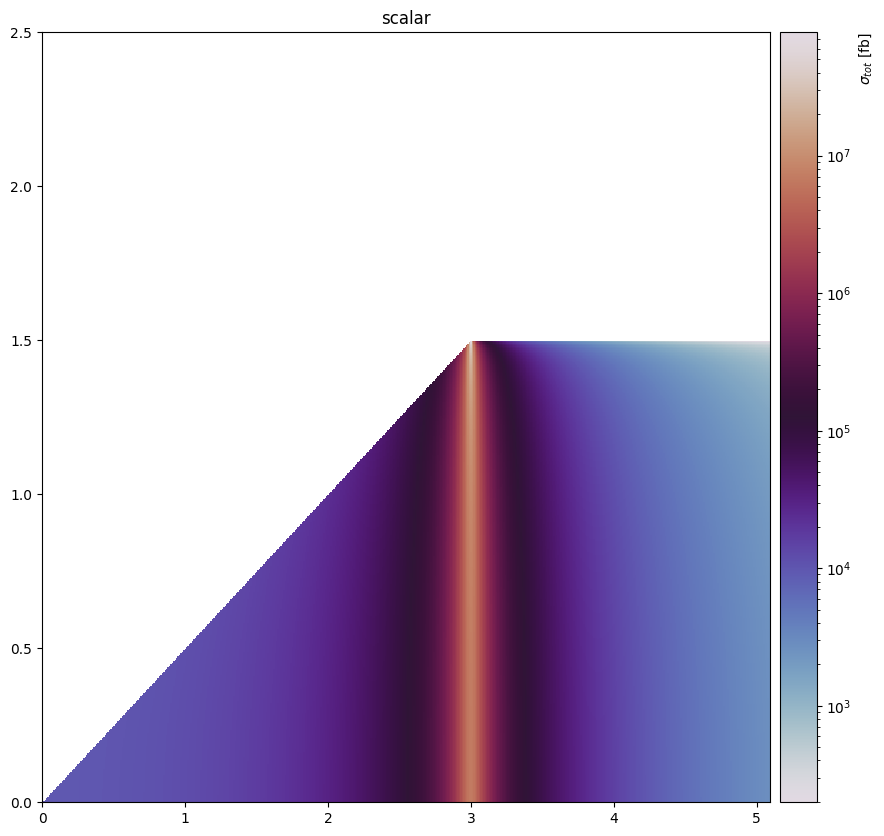

/tmp/ipykernel_1976221/2030789427.py:12: RuntimeWarning: invalid value encountered in sqrt
  return (1/16)*g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)*(M_med**2 - 4*m_f**2)/(np.pi*M_med)
/tmp/ipykernel_1976221/2030789427.py:46: RuntimeWarning: invalid value encountered in sqrt
  return (1/2)*np.sqrt(-4*m_f**2 + s)*(-4*g_s_chi**2*m_f**2*(g_ps_psi**2 + g_s_psi**2) + s*(g_ps_chi**2*g_ps_psi**2 + g_ps_chi**2*g_s_psi**2 + g_ps_psi**2*g_s_chi**2 + g_s_chi**2*g_s_psi**2))/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))


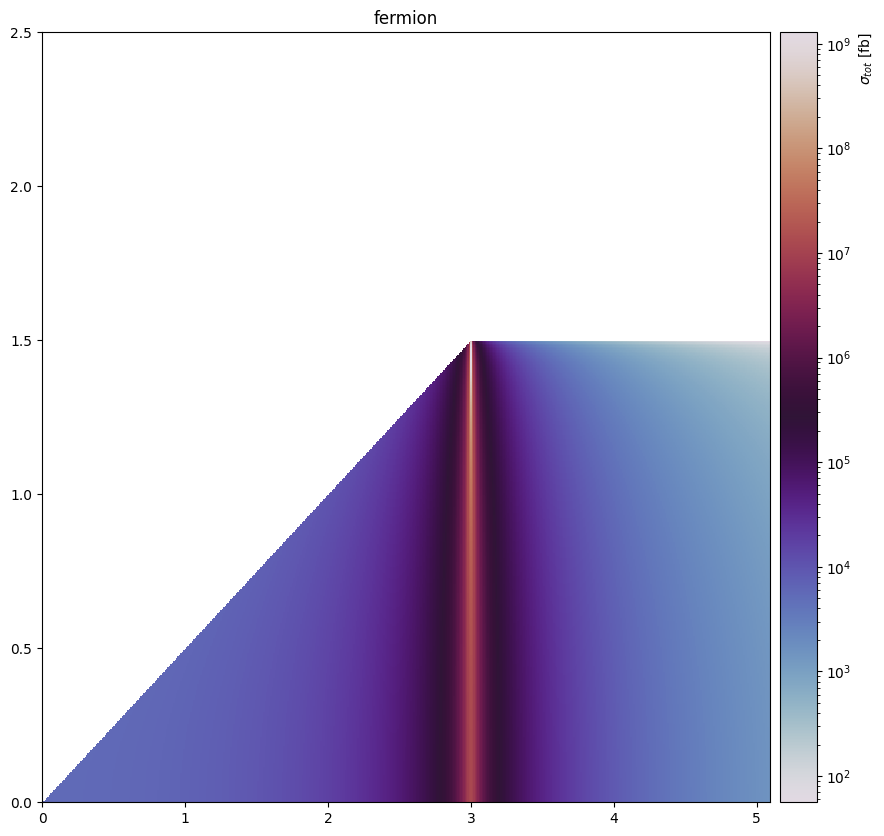

/tmp/ipykernel_1976221/2030789427.py:16: RuntimeWarning: invalid value encountered in sqrt
  return (1/64)*g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)*(M_med**4 - 8*M_med**2*m_f**2 + 16*m_f**4)/(np.pi*M_med*m_f**4)
/tmp/ipykernel_1976221/2030789427.py:58: RuntimeWarning: invalid value encountered in sqrt
  return (3/4)*g_s_chi**2*(g_ps_psi**2 + g_s_psi**2)*np.sqrt(-4*m_f**2 + s)/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))


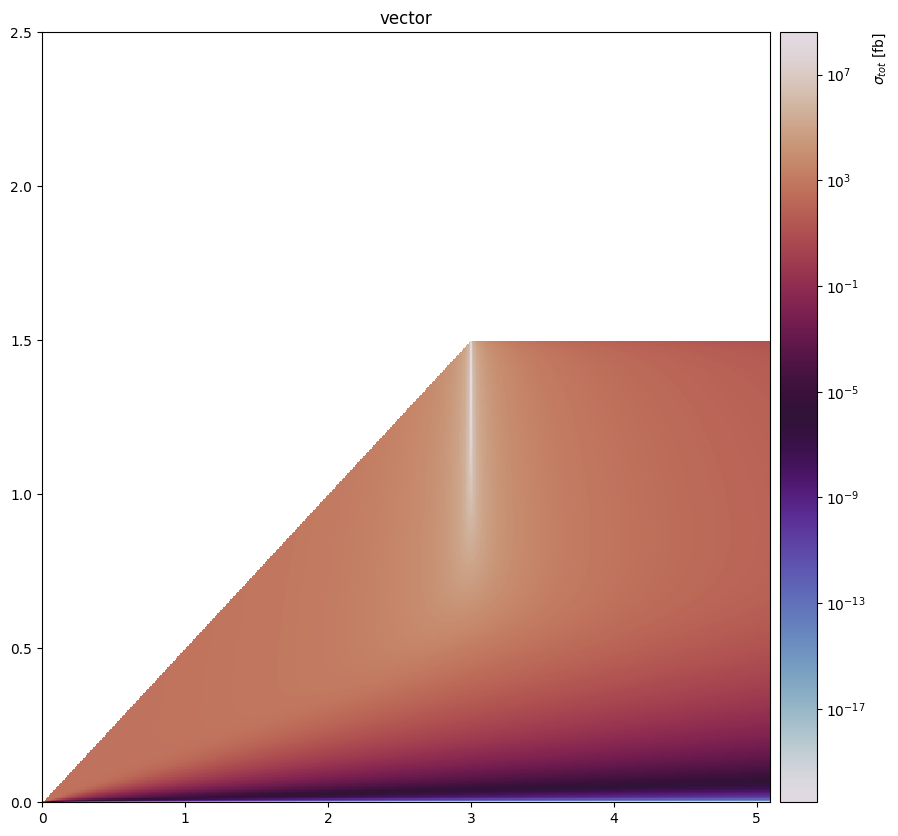

In [75]:
import matplotlib.pyplot as plt
import matplotlib.colorbar as colorb
from matplotlib import colors
from mpl_toolkits.axes_grid1 import ImageGrid



dm_types_list = ['scalar', 'fermion', 'vector']
results_dict = {}
brn = 0.3894*10**6 

def plot_simple_2d(Mmed_grid, mx_grid, results, plt_title=''):

        fig = plt.figure(figsize=(10, 10))
        ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(1,1),
                axes_pad=(0.30, 0.0),
                share_all=True,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.10,
                aspect=False
                )
                        
        fsize = 10
        im = ax[0].pcolormesh(Mmed_grid, mx_grid, results, norm=colors.LogNorm(), cmap= 'twilight', rasterized=True) ## heat map of xsec
        ax[0].cax.cla()
        cb = colorb.Colorbar(ax[0].cax, im)
        cb.set_label(r'$\sigma_{tot}$ [fb]', fontsize = fsize, loc='top')  ## color bar label 
        ax[0].set_title(plt_title)
        ax[0].tick_params(axis="x")
        ax[0].set_ylim(0, 2.5)

        plt.show()


for dm_type in dm_types_list:
        
        results_dict[dm_type] = xsec_func_dict[dm_type](Mmed_grid, g_ps_psi, g_ps_chi, smax, g_s_chi, g_s_psi, mx_grid, gamma_func_dict[dm_type])
        results = results_dict[dm_type]*brn

        plot_simple_2d(Mmed_grid, mx_grid, results, plt_title = dm_type)

        